# Comparing results CellDoctor-Developer
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [2]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [3]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [4]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.4
   pandas: 0.23.4
   seaborn: 0.9.0


# Loading CellDoctor the data

In [5]:
data_path = "../GFER/Data/Lyco/Lyco plate per person 27.03.2019/Alon 24h - agg_results.csv"
df = pd.read_csv(data_path, index_col=0)
df = df.drop(labels='index', axis=1)
df = df[df.nuc_outlier==False]
df = df[df.cyto_outlier==False]
df = df[df.Cyto_border_case==False]
df = df.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)
df.columns = df.columns.str.replace("GFER", "Cox17") # This is due to a naming mistake at the data creation

In [6]:
df.sample(7)

Actin_avg  Actin_max  Actin_q10  Actin_q50  Actin_q90  Actin_size  Actin_std  Actin_sum  Cyto_area  Cyto_aspect_ratio   Cyto_avg  Cyto_circularity_size_ratio  Cyto_cx  Cyto_cy  Cyto_extent  Cyto_h  Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter  Cyto_q10  Cyto_q50  Cyto_q90  Cyto_rect_area  Cyto_size  Cyto_solidity   Cyto_std   Cyto_sum  Cyto_w  Cox17_avg  Cox17_in_MitoTracker_avg  Cox17_in_MitoTracker_max  Cox17_in_MitoTracker_q10  Cox17_in_MitoTracker_q50  Cox17_in_MitoTracker_q90  Cox17_in_MitoTracker_size  Cox17_in_MitoTracker_std  Cox17_in_Nucli_avg  Cox17_in_Nucli_max  Cox17_in_Nucli_q10  Cox17_in_Nucli_q50  Cox17_in_Nucli_q90  Cox17_in_Nucli_size  Cox17_in_Nucli_std  Cox17_max  Cox17_outside_MitoTracker_avg  Cox17_outside_MitoTracker_max  Cox17_outside_MitoTracker_q10  Cox17_outside_MitoTracker_q50  Cox17_outside_MitoTracker_q90  Cox17_outside_MitoTracker_size  Cox17_outside_MitoTracker_std  Cox17_outside_Nucli_avg  Cox17_outside_Nucli_max  \
26412   5.970393       28.0        3.0        6.0       10.0     15638.0   2.871143    93365.0    51719.0           0.612091   3.477468                     0.353955    795.0    910.0     0.536109   397.0      13.0                   147708.230423     1251.602159       2.0       2.0       8.0         96471.0    52282.0       0.799898   2.718336   181809.0   243.0   3.000000                  2.999714                      15.0                       2.0                       2.0                       5.0                     3499.0                  1.661648            2.169195                 6.0                 2.0                 2.0                 3.0                857.0            0.497915       15.0                       3.022222                           11.0                            2.0                            2.0                            5.0                            45.0                       1.926296                 3.264980                     15.0   
15282   3.358163       29.0        2.0        3.0        5.0     73486.0   1.646299   246778.0   118306.0           0.831974  17.046747                     0.398817   1129.0   1669.0     0.378422   613.0     126.0                   294738.879200     2576.008352       4.0      11.0      42.0        312630.0   117547.0       0.627453  17.280558  2003794.0   510.0   2.442065                  2.442416                       8.0                       2.0                       2.0                       4.0                    17635.0                  0.892405            2.300370                 5.0                 2.0                 2.0                 3.0               2164.0            0.515365        8.0                       2.000000                            2.0                            2.0                            2.0                            2.0                            14.0                       0.000000                 2.461866                      8.0   
17085   3.477633       13.0        2.0        3.0        6.0     10462.0   1.660264    36383.0    28553.0           3.272222  14.892756                     0.108586    771.0    513.0     0.269317   180.0      65.0                   273589.683684     1491.518895       3.0      10.0      35.0        106020.0    29708.0       0.481140  13.118193   442434.0   589.0   2.511196                  2.513643                       8.0                       2.0                       2.0                       4.0                     2089.0                  1.030381            2.328782                 8.0                 2.0                 2.0                 3.0                952.0            0.804459        8.0                       2.000000                            2.0                            2.0                            2.0                            2.0                            10.0                       0.000000                 2.662598                      8.0   
703     2.815813        8.0        2.0        3.0        4.0      6678.0   0.945937

In [7]:
# Adding Compunds and concentration 
df["Compound"] = np.nan
df.loc[df.column.isin([2, 3]), "Compound"] = "Control"
df.loc[df.column.isin([4, 5]), "Compound"] = "DMSO"
df.loc[df.column.isin([6, 7]), "Compound"] = "Lyco Low"
df.loc[df.column.isin([8, 9]), "Compound"] = "Lyco Medium"
df.loc[df.column.isin([10, 11]), "Compound"] = "Lyco High"
display('ok'if df["Compound"].isna().any()==False else ':-(')

'ok'

In [8]:
compound_plate = df.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column       2        3     4     5         6         7            8            9          10         11
row                                                                                                     
B       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
C       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
D       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
E       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
F       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
G       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High

# Loading Developer data

In [15]:
data_path = "../GFER/Data/Lyco/Lyco plate per person 27.03.2019/AV 24h - Standard lab acquisition protocol GFER IF_AVlyco24hcox17andmito_1.2019.03.27.11.22.52.xlsx"

In [27]:
df_dev = pd.read_excel(data_path, sheet_name='Nuc_cell_TMRE_MITOTRACKER', header=1, skiprows=0)
# remove redundent column
df_dev.drop("Target",axis=1, inplace=True)
# extract the positional data 
loc_df = df_dev.Section.str.extract("(.*) - (.*) \(fld (.*)\).*",expand=True)
loc_df.columns=["row","column", "field"]
loc_df.column = loc_df['column'].astype(np.int16)
df_dev = pd.concat([df_dev, loc_df], axis=1)
df_dev.drop("Section",axis=1, inplace=True)

In [28]:
df_dev.sample(7)

TMRE AREA  TMRE POS X  TMRE POS Y  TMRE INTENSITY  TMRE FORM FACTOR  TMRE COUNT    TMRE DxA  MITOTRECKER AREA  MITO POS Y  MITOTRACKER DxA  MITOTRACKER FORM FACTOR  MITOTRACKER INTENSITY  MITOTRACKER COUNT  MITO POS X  NUCLEAR DXA  NUC CG X  NUC CG Y  NUC FORM FACTOR  NUC MEDIAN DENSITY  NUCLEAR PARIMETER  NUCLEAR WRMI  NUCLEUS MAX CHORD  NUCLEAR AVG DIAMETER  NUCLEAR MED DIAMETER  NUCLEAR AREA  NUCLEAR INTENSITY  CELL INTENSITY      CELL DXA  CELL AREA  CELL FORM FACTOR  CELL FIBER LENGTH  CELL END NODES  CELL PARIEMETER  CELL AVG  DIAMETER  CELL MED DIAMETER  CELL FRMI  CELL LENGTH  CELL CROSSING POINTS  CELL BRANCH NODES row  column field
8163     36.547   44373.407   32681.042       83235.820             1.247          78   41578.109             1.690    1643.637         4309.353                    1.404               6142.923                  4    2330.817   630389.068   574.491   410.920            0.858              1356.0             83.045         1.065             30.607                30.851                36.458       470.778           1339.038        3554.025  2.161137e+07   6080.817             0.138           1075.410              59          744.896              30.851             36.458      1.218      149.021                     2                 51   E       7     5
5467      0.634     562.092    2253.404        4244.500             1.324           4     675.165             2.007    1691.396         1259.069                    0.818               1874.857                  3     441.186   324415.893   140.482   567.966            0.962              2100.0             46.816         0.766             16.377                 9.125                 7.161       167.841           1932.880        5829.010  3.128980e+06    536.794             0.186            174.850              19          190.658               9.125              7.161      0.900       55.090                     3                 12   D       6    19
7960     22.287    6829.227   21289.759       46968.631             1.114          42   27240.568             1.584    1515.900         2667.177                    1.107               3656.818                  3     503.754   332337.781   169.224   505.468            0.785              1641.0             58.764         1.095             23.597                 9.642                11.749       215.584           1541.571        5250.417  5.013436e+06    954.864             0.105            311.155              31          338.111               9.642             11.749      1.265       60.309                     5                 22   E       6    13
357      84.818   42699.926   50728.595      250134.138             1.202         221  103316.108           516.937   28228.244       454062.808                    1.046             125267.429                115   23208.925  1447069.735   156.898   178.254            0.946              2526.0             88.092         0.960             31.786                22.603                20.740       584.009           2477.819        6289.792  5.781939e+07   9192.576             0.033           1709.913              98         1884.138              22.603             20.740      0.739      315.054                     9                 78   B       4     2
2839     93.796   33398.387   35297.766      111433.718             1.044          91  138241.539           272.094   15902.261       304610.380                    0.987              41379.301                 41   14913.210   444600.461   376.402   391.090            0.957              1687.0             58.872         0.952             21.144                 9.402                 9.521       263.855           1685.017       11165.888  1.466720e+07   1313.572             0.041            523.066              55          631.641               9.402              9.521      0.834       91.729                     7                 40   C       7     6
7753     34.117   28860.930   60380.023      119097.745             1.

In [32]:
# Adding Compunds and concentration 
df_dev["Compound"] = np.nan
df_dev.loc[df_dev.column.isin([2, 3]), "Compound"] = "Control"
df_dev.loc[df_dev.column.isin([4, 5]), "Compound"] = "DMSO"
df_dev.loc[df_dev.column.isin([6, 7]), "Compound"] = "Lyco Low"
df_dev.loc[df_dev.column.isin([8, 9]), "Compound"] = "Lyco Medium"
df_dev.loc[df_dev.column.isin([10, 11]), "Compound"] = "Lyco High"
display('ok'if df_dev["Compound"].isna().any()==False else ':-(')

'ok'

In [33]:
compound_plate = df_dev.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column       2        3     4     5         6         7            8            9          10         11
row                                                                                                     
B       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
C       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
D       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
E       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
F       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium  Lyco High  Lyco High
G       Control  Control  DMSO  DMSO  Lyco Low  Lyco Low  Lyco Medium  Lyco Medium        NaN        NaN

# Number of cells 

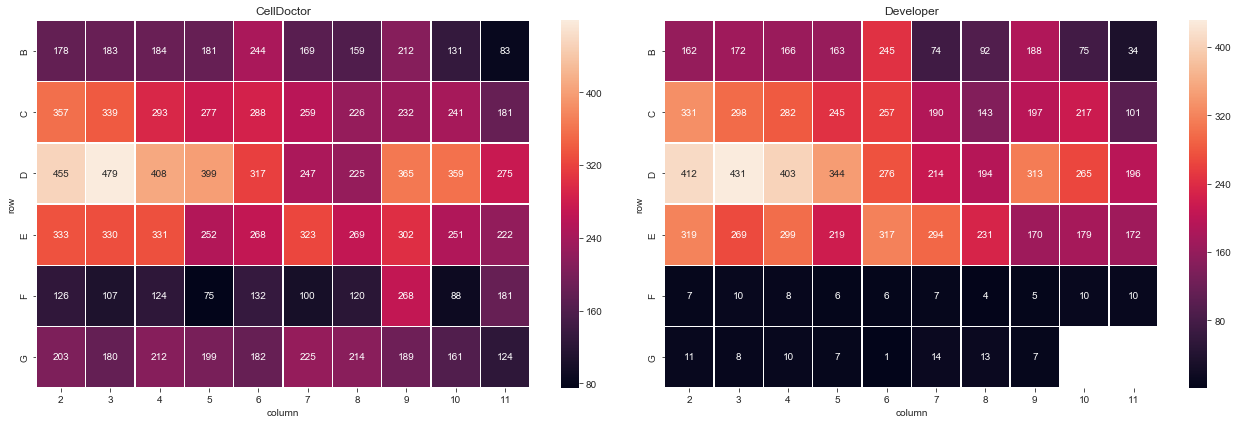

In [49]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 6)

cell_in_well = df.groupby(["row", "column"])["Compound"].count().unstack(level=-1)
ax[0] = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f", ax=ax[0])
ax[0].set_title("CellDoctor")

cell_in_well_dev = df_dev.groupby(["row", "column"])["Compound"].count().unstack(level=-1)
ax[1] = sns.heatmap(cell_in_well_dev, linewidths=0.5, annot=True, fmt="0.00f", ax=ax[1])
ax[1].set_title("Developer")

plt.tight_layout()

From This comparison by developer in a random field at G10 there should not be any cells. Let's check it out.

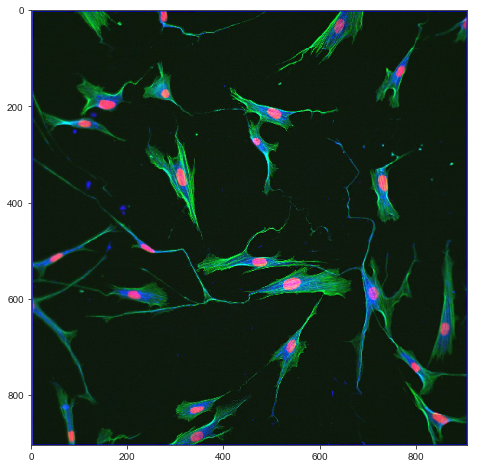

In [174]:
img = plt.imread('./Data/AV Lyco 24h G-10 fld 08 (comparing results).jpg')
plt.imshow(img)

Let look how a random field at G9 looks like

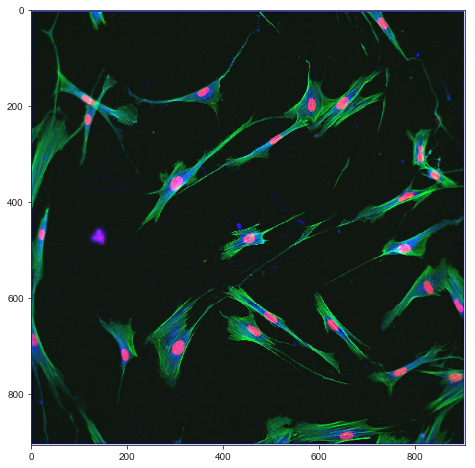

In [152]:
img = plt.imread('./Data/AV Lyco 24h G-09 fld18 (comparing results).jpg')
plt.imshow(img)

In [175]:
img.shape

(904, 907, 3)

In [207]:
import json
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import to_rgba


def load_img_and_segmentation(img_path, seg_path):
    img = plt.imread(img_path)

    with open(seg_path, 'r') as f:
        segmentation_data = json.load(f)
        

    fig, ax = plt.subplots(1,1)

    ax.imshow(img)
    patches = []

    for shape in segmentation_data['shapes']:
        points = np.array(shape['points'])
        color = to_rgba(np.array(shape['fill_color'])/255)
        points[:,0]=(points[:,0]*img.shape[0]/2048)
        points[:,1]=(points[:,1]*img.shape[1]/2048)
        points[:,1] = points[:,1]-10  # am not sure why is is needed probably due to the printscreen changes in resultion and image size  
        ax.add_patch(Polygon(points, True, linewidth=2 ,edgecolor=color,facecolor=color,alpha=0.5))

    plt.show()        

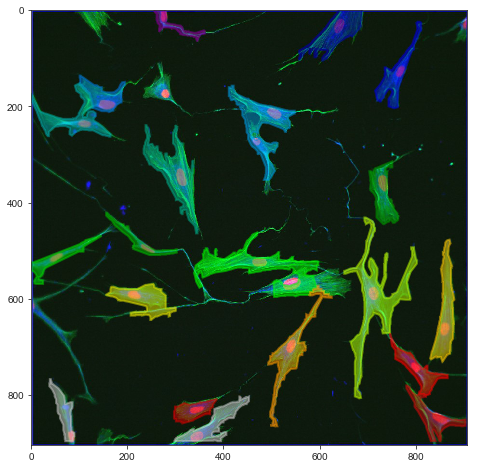

In [208]:
load_img_and_segmentation('./Data/AV Lyco 24h G-10 fld 08 (comparing results).jpg', './Data/G - 10(fld 08 wv Cy3 - Cy3).json')

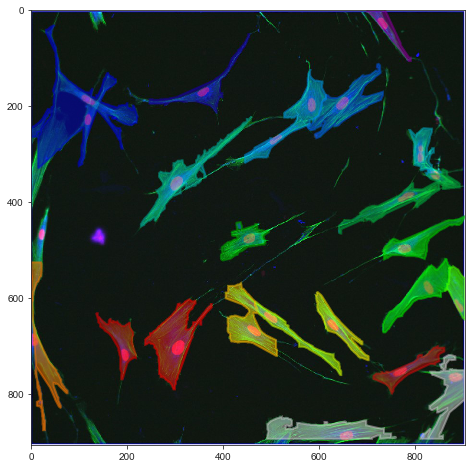

In [209]:
load_img_and_segmentation('./Data/AV Lyco 24h G-09 fld18 (comparing results).jpg', './Data/G - 09(fld 18 wv Cy3 - Cy3).json')

In [155]:
order = ['Control', 'DMSO', 
         'Lyco Low', 'Lyco Medium', 'Lyco High'
        ]

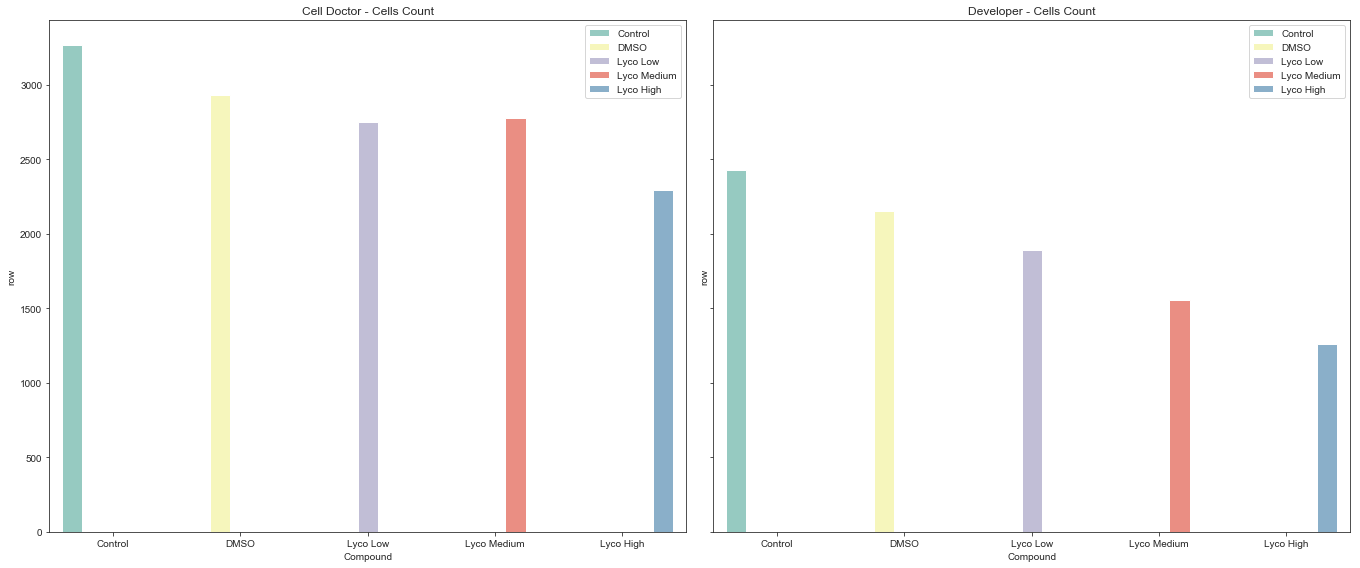

In [158]:
g = df.groupby(['Compound'])["row"].count().reset_index()
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(19, 8)

sns.barplot(x="Compound", y="row", hue="Compound", data=g, palette="Set3" ,ax=ax[0], ci=None, hue_order=order, order=order);
ax[0].set_title("Cell Doctor - Cells Count")
ax[0].legend(loc = 1)

g_dev = df_dev.groupby(['Compound'])["row"].count().reset_index()
sns.barplot(x="Compound", y="row", hue="Compound", data=g_dev, palette="Set3" ,ax=ax[1], ci=None, hue_order=order, order=order);
ax[1].set_title("Developer - Cells Count")
ax[1].legend(loc = 1)

plt.tight_layout()

# Analysis of results

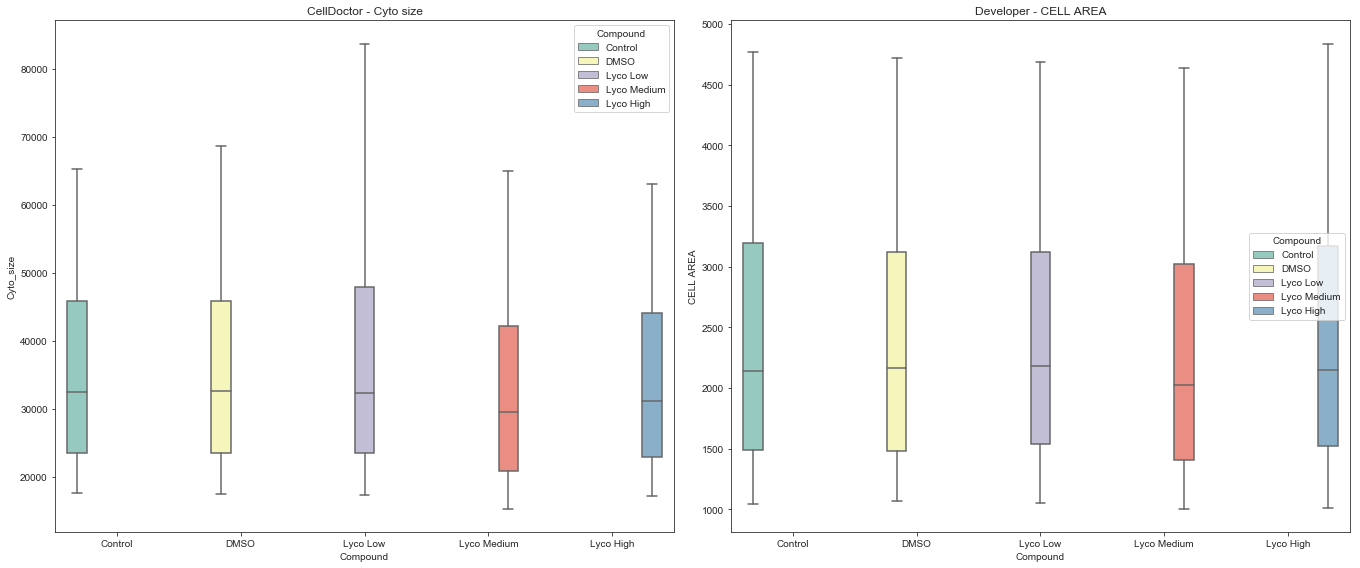

In [164]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cyto_size", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax[0], hue_order=order, order=order)
ax[0].set_title('CellDoctor - Cyto size')

sns.boxplot(x="Compound", y="CELL AREA", hue="Compound", data=df_dev, palette="Set3", showfliers=False, whis = [10,90], ax=ax[1], hue_order=order, order=order)
ax[1].set_title('Developer - CELL AREA')

plt.tight_layout()

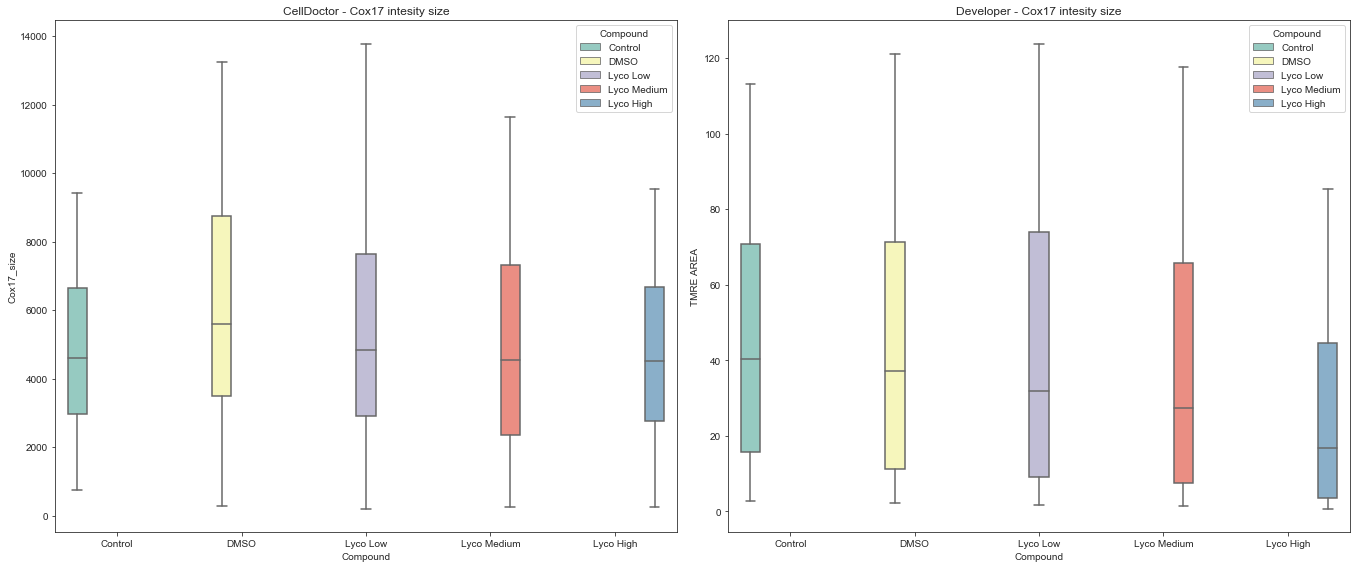

In [163]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_size", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax[0], hue_order=order, order=order)
ax[0].set_title('CellDoctor - Cox17 size')

sns.boxplot(x="Compound", y="TMRE AREA", hue="Compound", data=df_dev, palette="Set3", showfliers=False, whis = [10,90], ax=ax[1], hue_order=order, order=order)
ax[1].set_title('Developer - TMRE AREA')

plt.tight_layout()

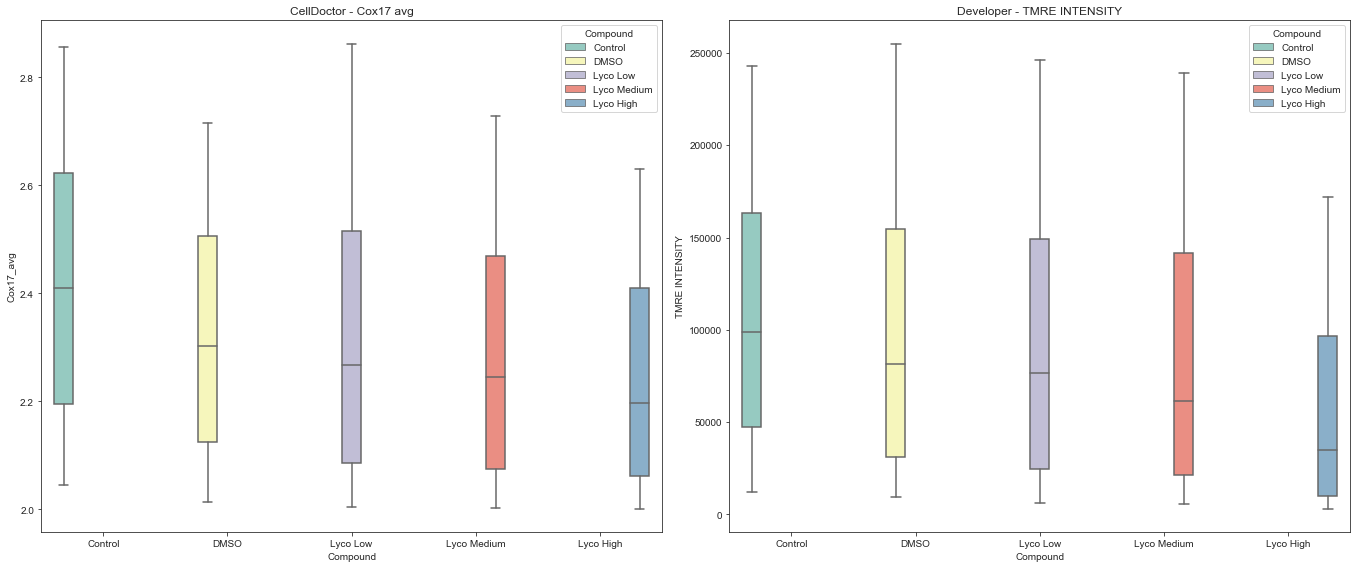

In [165]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="Cox17_avg", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax[0], hue_order=order, order=order)
ax[0].set_title('CellDoctor - Cox17 avg')

sns.boxplot(x="Compound", y="TMRE INTENSITY", hue="Compound", data=df_dev, palette="Set3", showfliers=False, whis = [10,90], ax=ax[1], hue_order=order, order=order)
ax[1].set_title('Developer - TMRE INTENSITY')

plt.tight_layout()

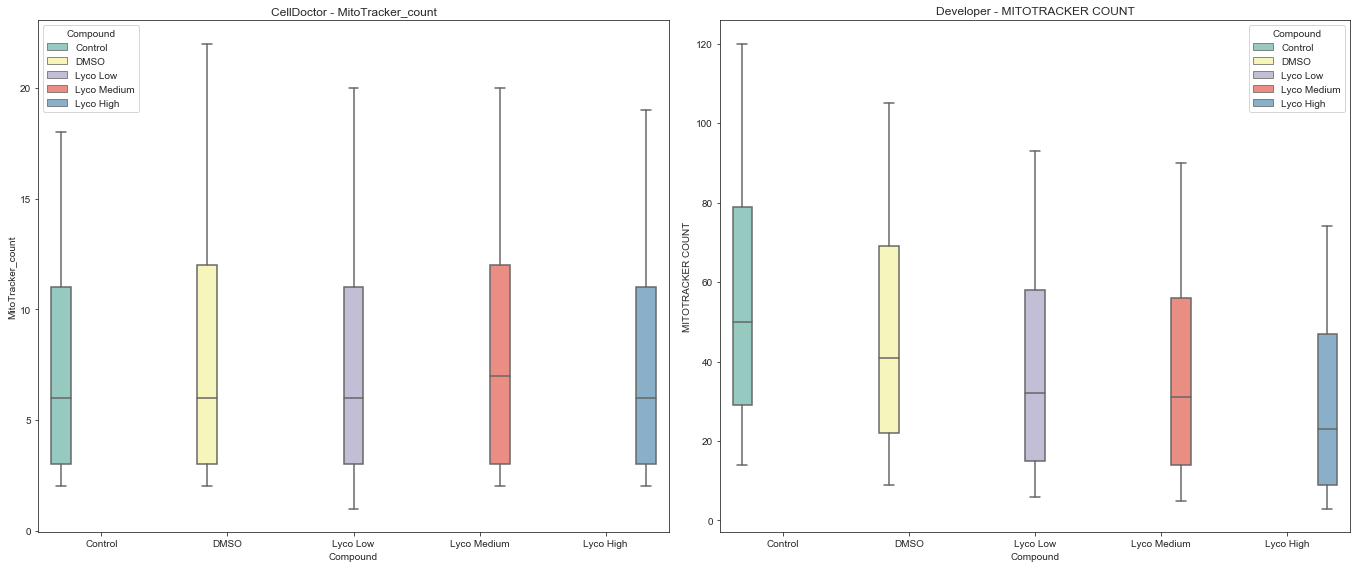

In [168]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="MitoTracker_count", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax[0], hue_order=order, order=order)
ax[0].set_title('CellDoctor - MitoTracker_count')

sns.boxplot(x="Compound", y="MITOTRACKER COUNT", hue="Compound", data=df_dev, palette="Set3", showfliers=False, whis = [10,90], ax=ax[1], hue_order=order, order=order)
ax[1].set_title('Developer - MITOTRACKER COUNT')

plt.tight_layout()

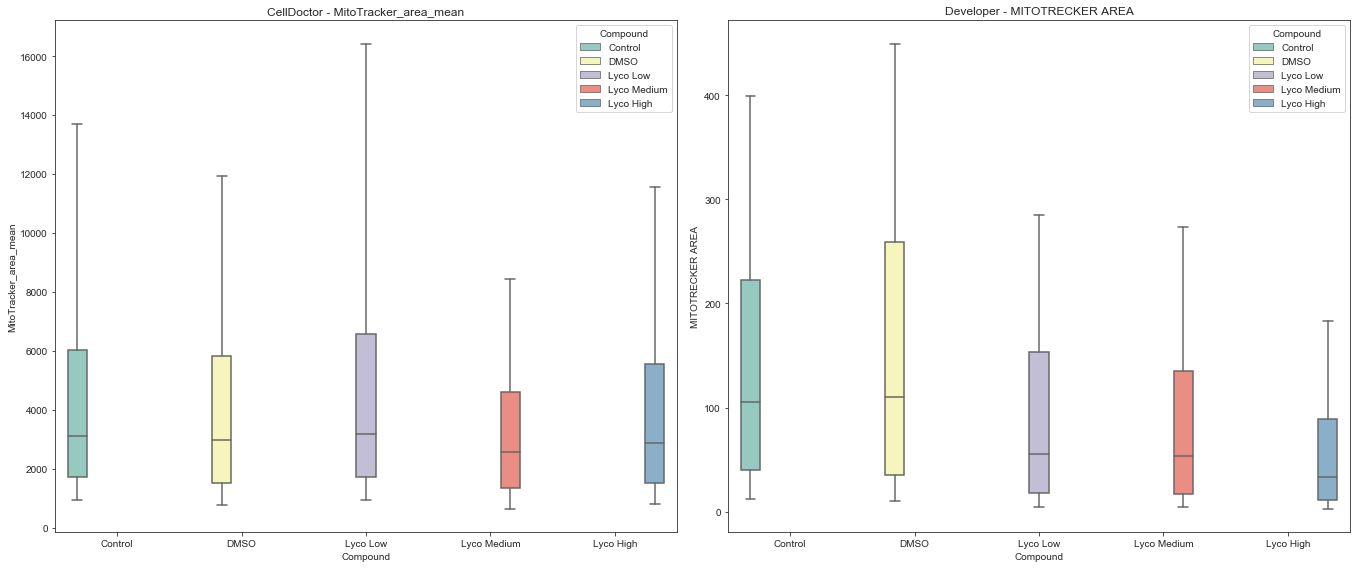

In [169]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
sns.boxplot(x="Compound", y="MitoTracker_area_mean", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax[0], hue_order=order, order=order)
ax[0].set_title('CellDoctor - MitoTracker_area_mean')

sns.boxplot(x="Compound", y="MITOTRECKER AREA", hue="Compound", data=df_dev, palette="Set3", showfliers=False, whis = [10,90], ax=ax[1], hue_order=order, order=order)
ax[1].set_title('Developer - MITOTRECKER AREA')

plt.tight_layout()